In [2]:
import sys
wd = '/ceph/ibmi/it/users/zabel/tsne/diss'
sys.path.insert(0, wd)

import numpy as np

from utils import plot_heatmap
import matplotlib.pyplot as plt
import tikzplotlib

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams['figure.dpi'] = 600
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))

In [ ]:
Y_star = np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/tsne_embedding.npy')
labels_unique = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']
labels = labels_unique

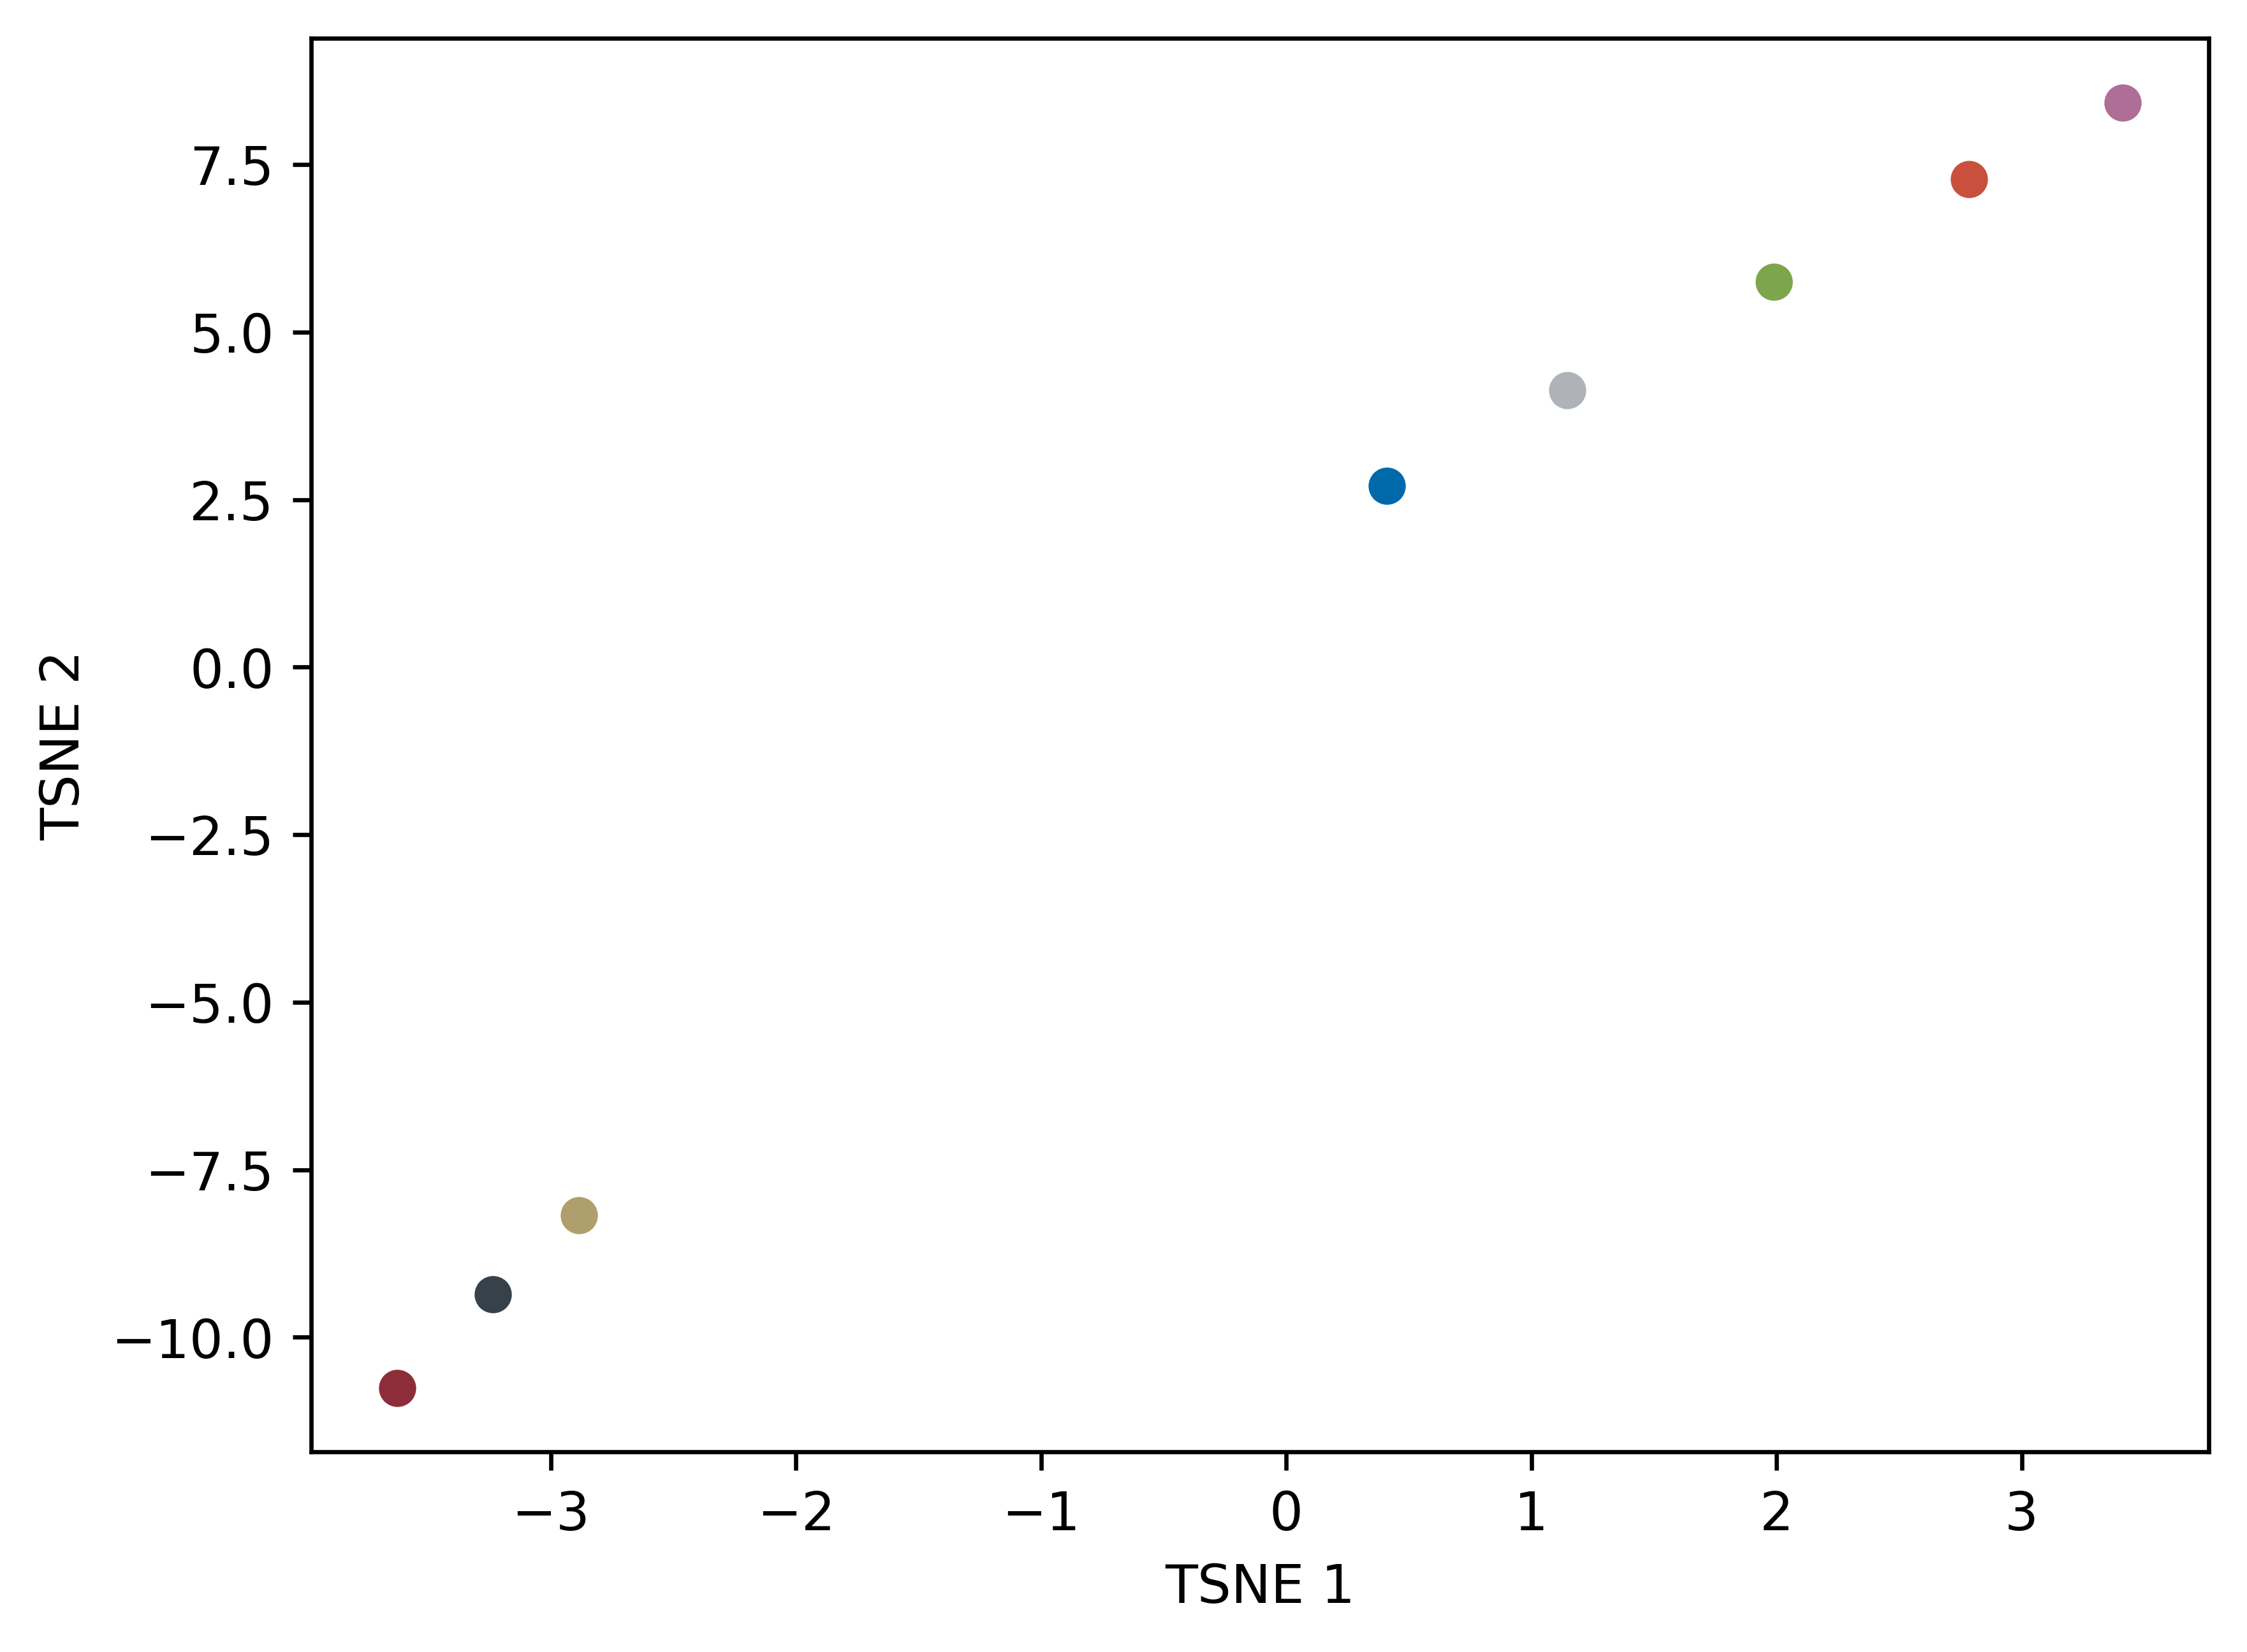

In [ ]:
cmap = palettes.tue_plot
color_mapping = {label: cmap[i] for i, label in enumerate(labels_unique)}
f = plt.figure()
for i in labels_unique:
  inds = [j == i for j in labels]
  scatter = plt.plot(Y_star[inds, 0], Y_star[inds, 1], c = color_mapping[i], label=i, marker='o')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#plt.legend(handles=scatter.legend_elements(num=8)[0], labels=labels)
#plt.legend()
tikzplotlib.save("/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/tsne.pgf")


In [ ]:
sensitivities= np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities.npy')


-0.04049674 0.07254741


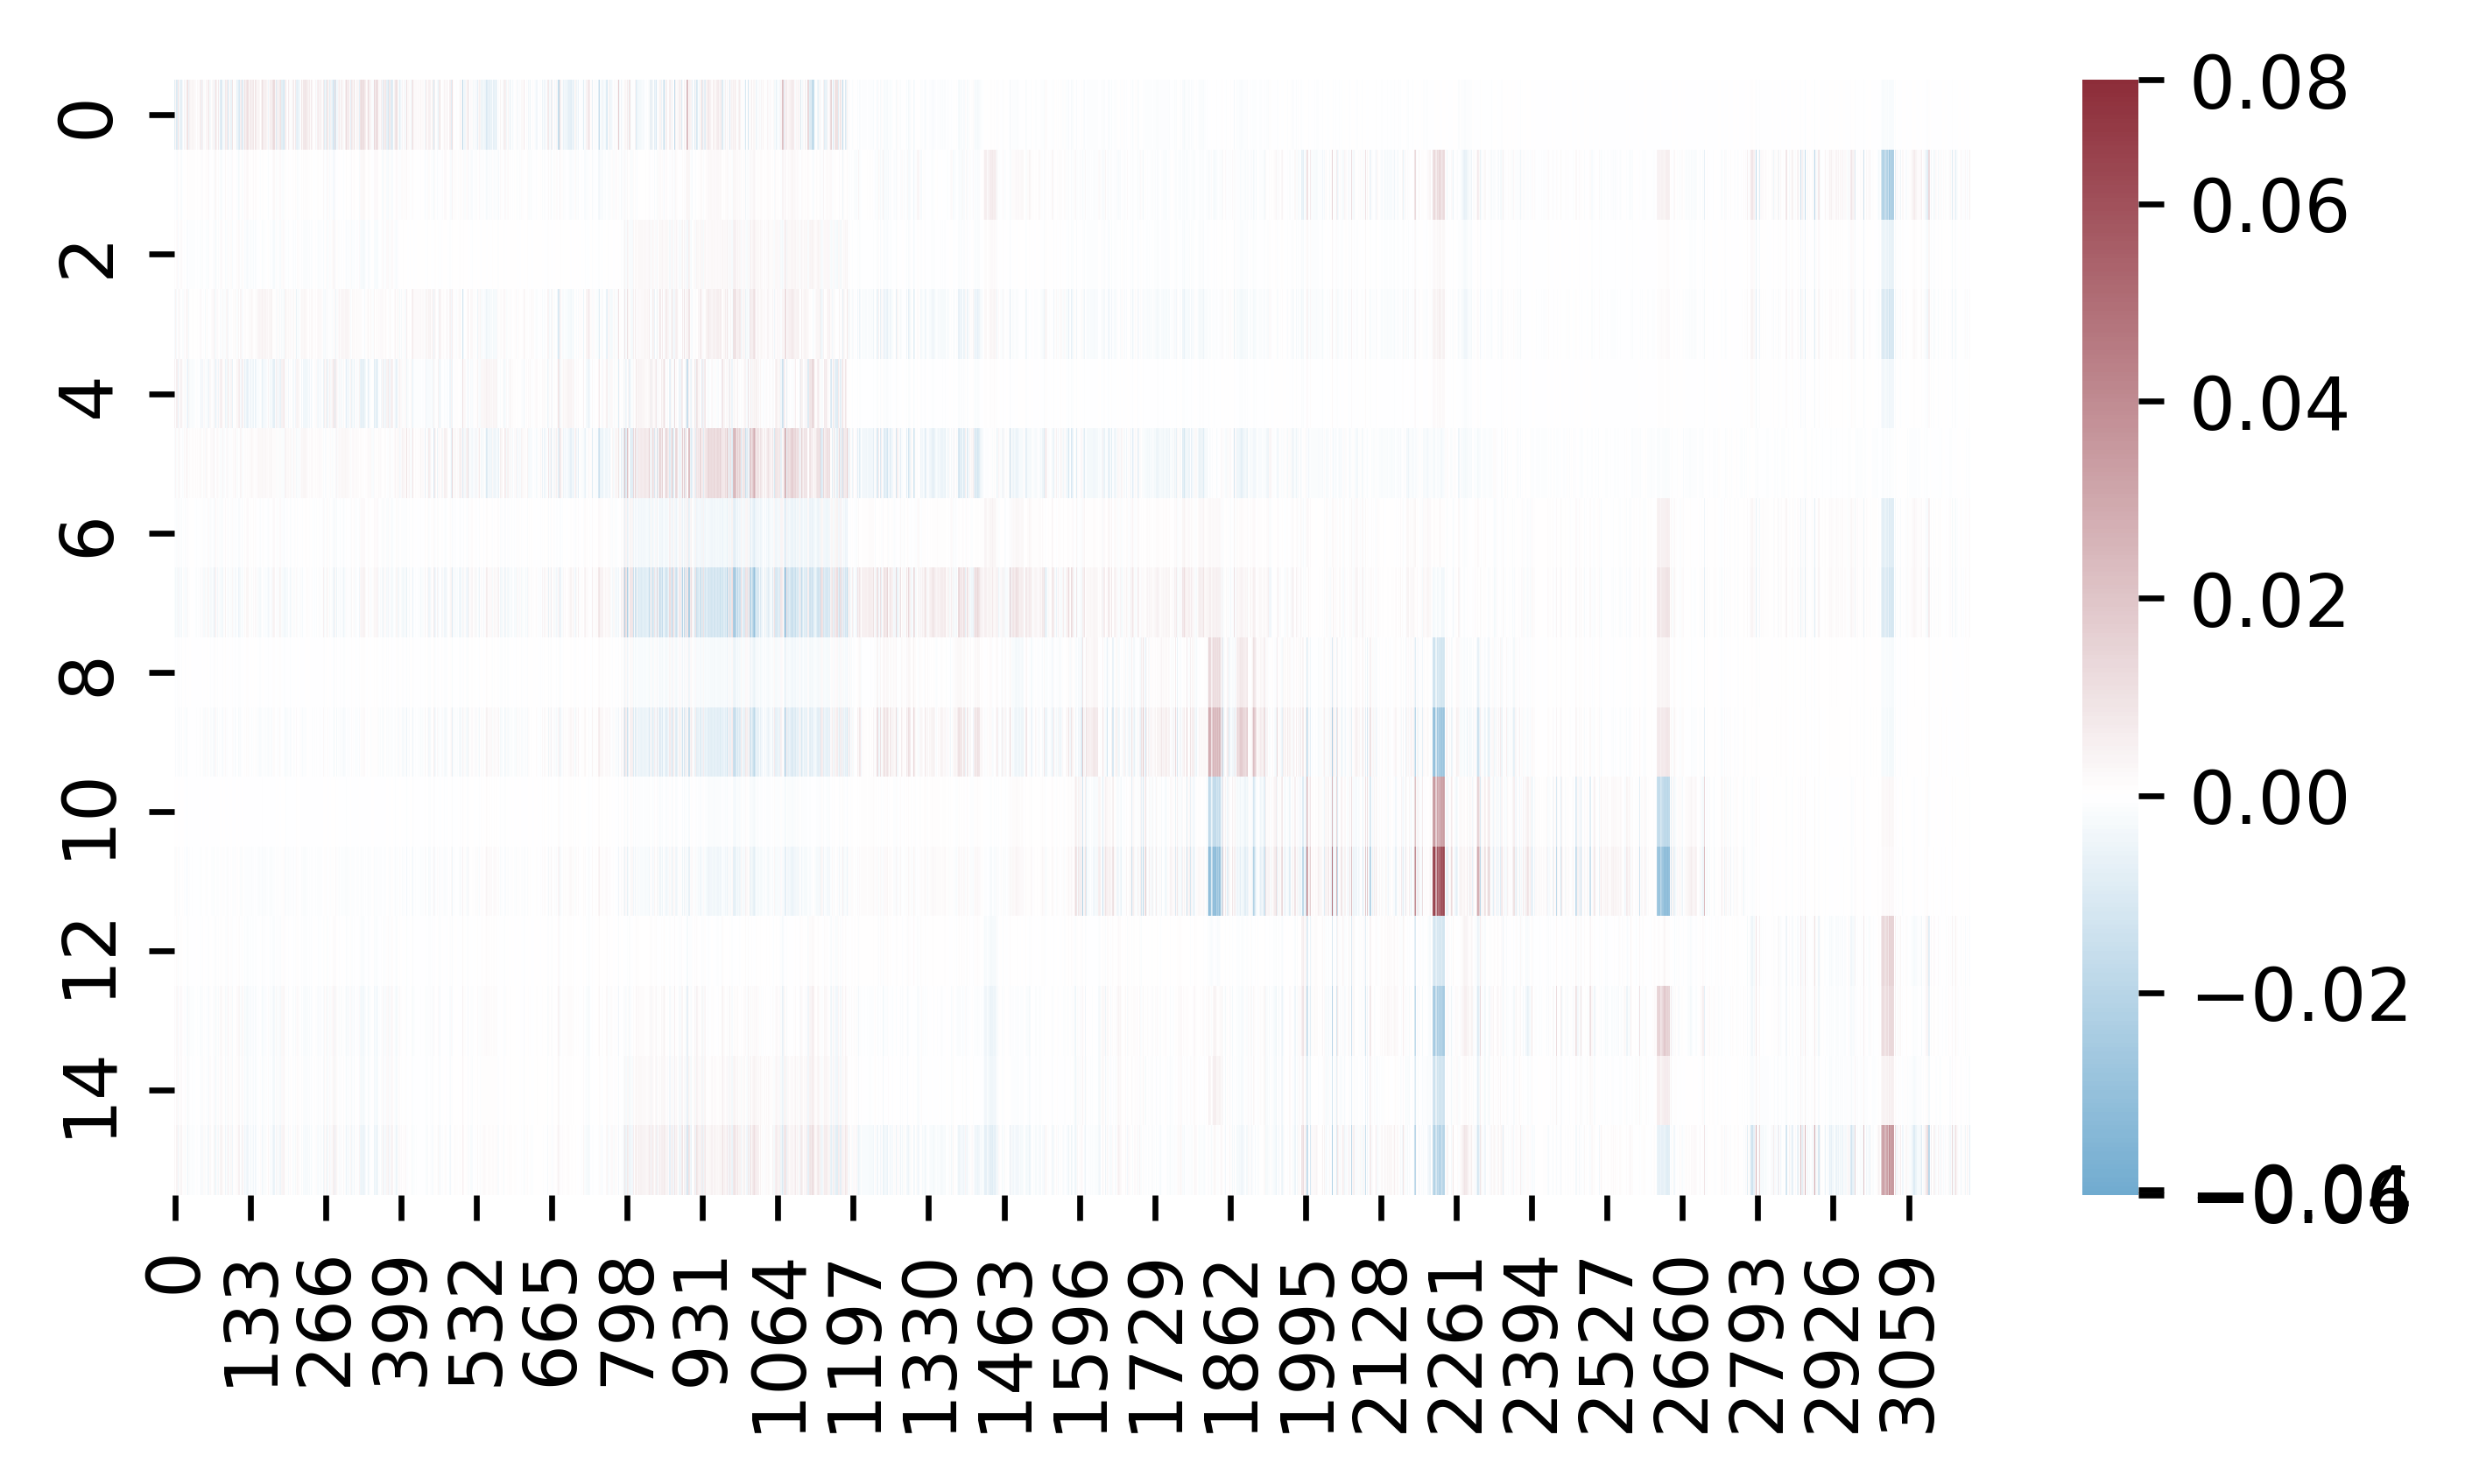

In [ ]:
px = 1/plt.rcParams['figure.dpi']
cm = 1/2.54
print(np.min(sensitivities), np.max(sensitivities))
plot_heatmap(sensitivities, figsize=(14*cm, 7*cm), with_cell_lines=False)
tikzplotlib.save("/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities.pgf")

In [12]:
np.sum(np.abs(sensitivities), axis=1)

array([ 6.3133783,  5.0614367,  2.7746575,  5.745015 ,  4.25466  ,
        9.215455 ,  4.2001553, 10.762567 ,  4.0485716,  9.737133 ,
        5.0456905,  9.677723 ,  2.9686513,  5.266861 ,  3.9444385,
        8.9302635], dtype=float32)

In [ ]:
sensitivities_summarized = np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities_summarized.npy')


0.0015685143 0.29669863


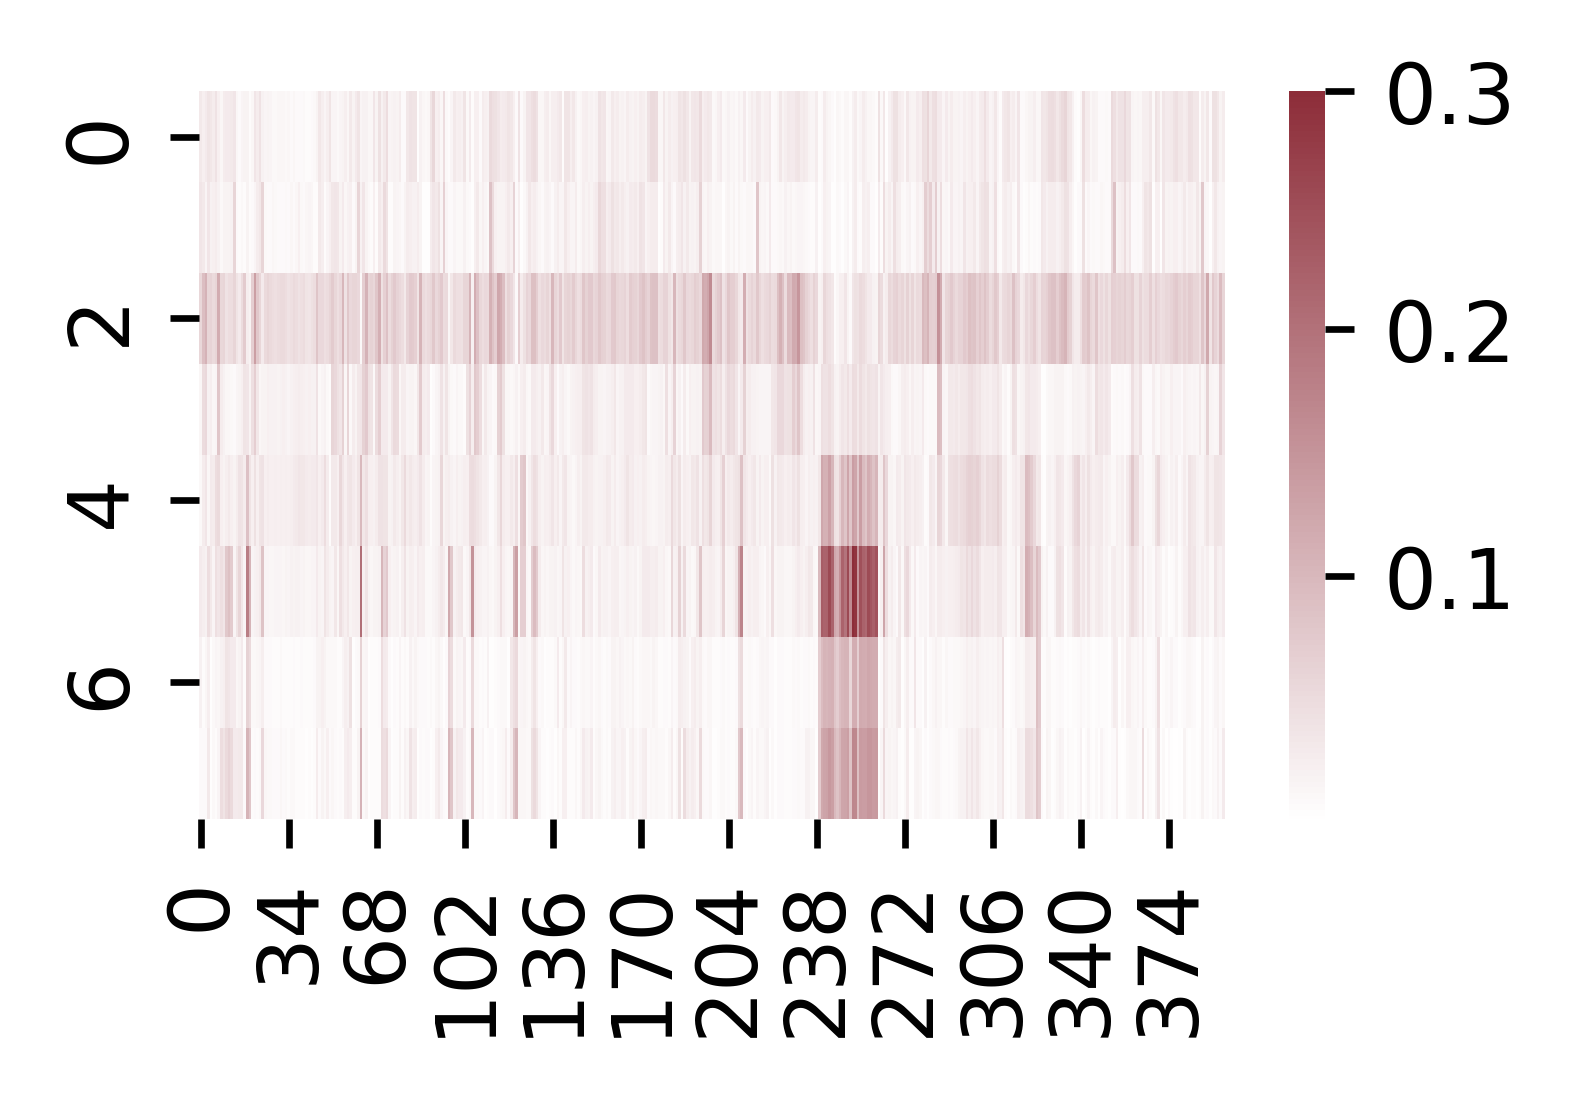

In [ ]:
px = 1/plt.rcParams['figure.dpi']
cm = 1/2.54
print(np.min(sensitivities_summarized), np.max(sensitivities_summarized))
plot_heatmap(sensitivities_summarized, figsize=(7*cm, 4*cm), with_cell_lines=False)
tikzplotlib.save("/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities_summarized.pgf")

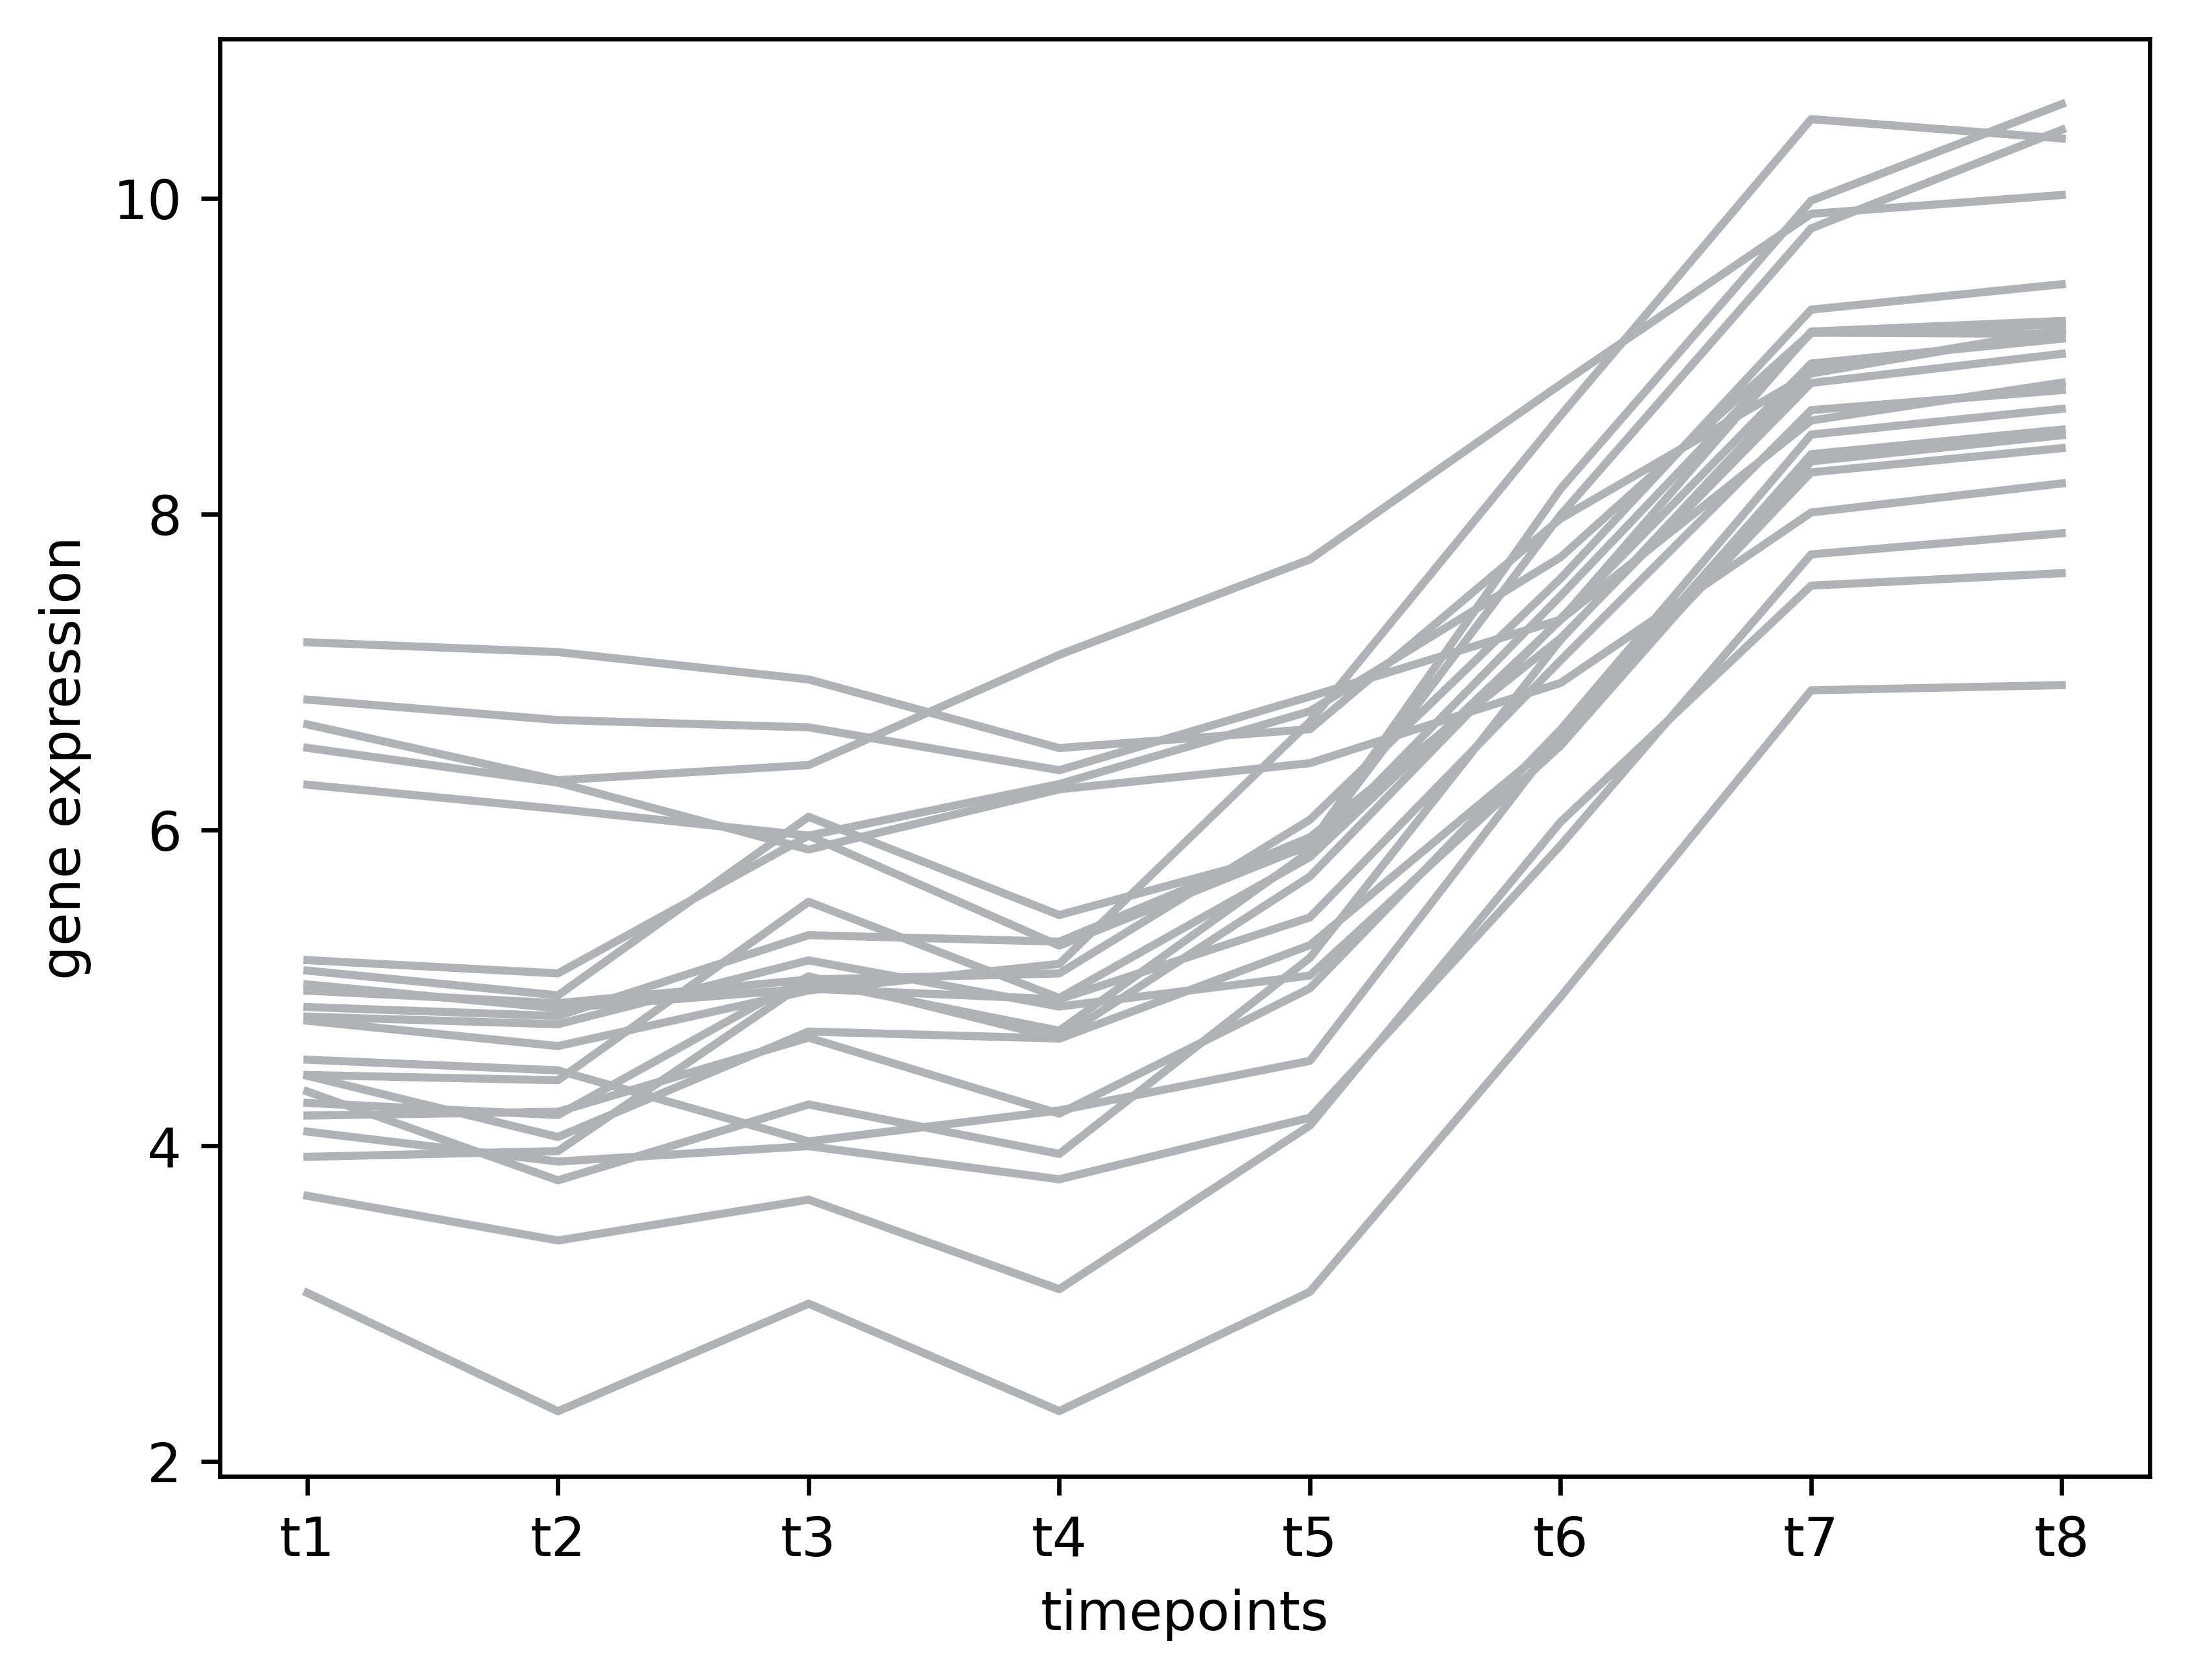

In [ ]:
X = np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/actinorhodin.npy')
f = plt.figure()
plt.plot(X, c=palettes.tue_plot[4])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=labels)
plt.xlabel('timepoints')
plt.ylabel('gene expression')
tikzplotlib.save("/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/actinorhodinProfiles.pgf")

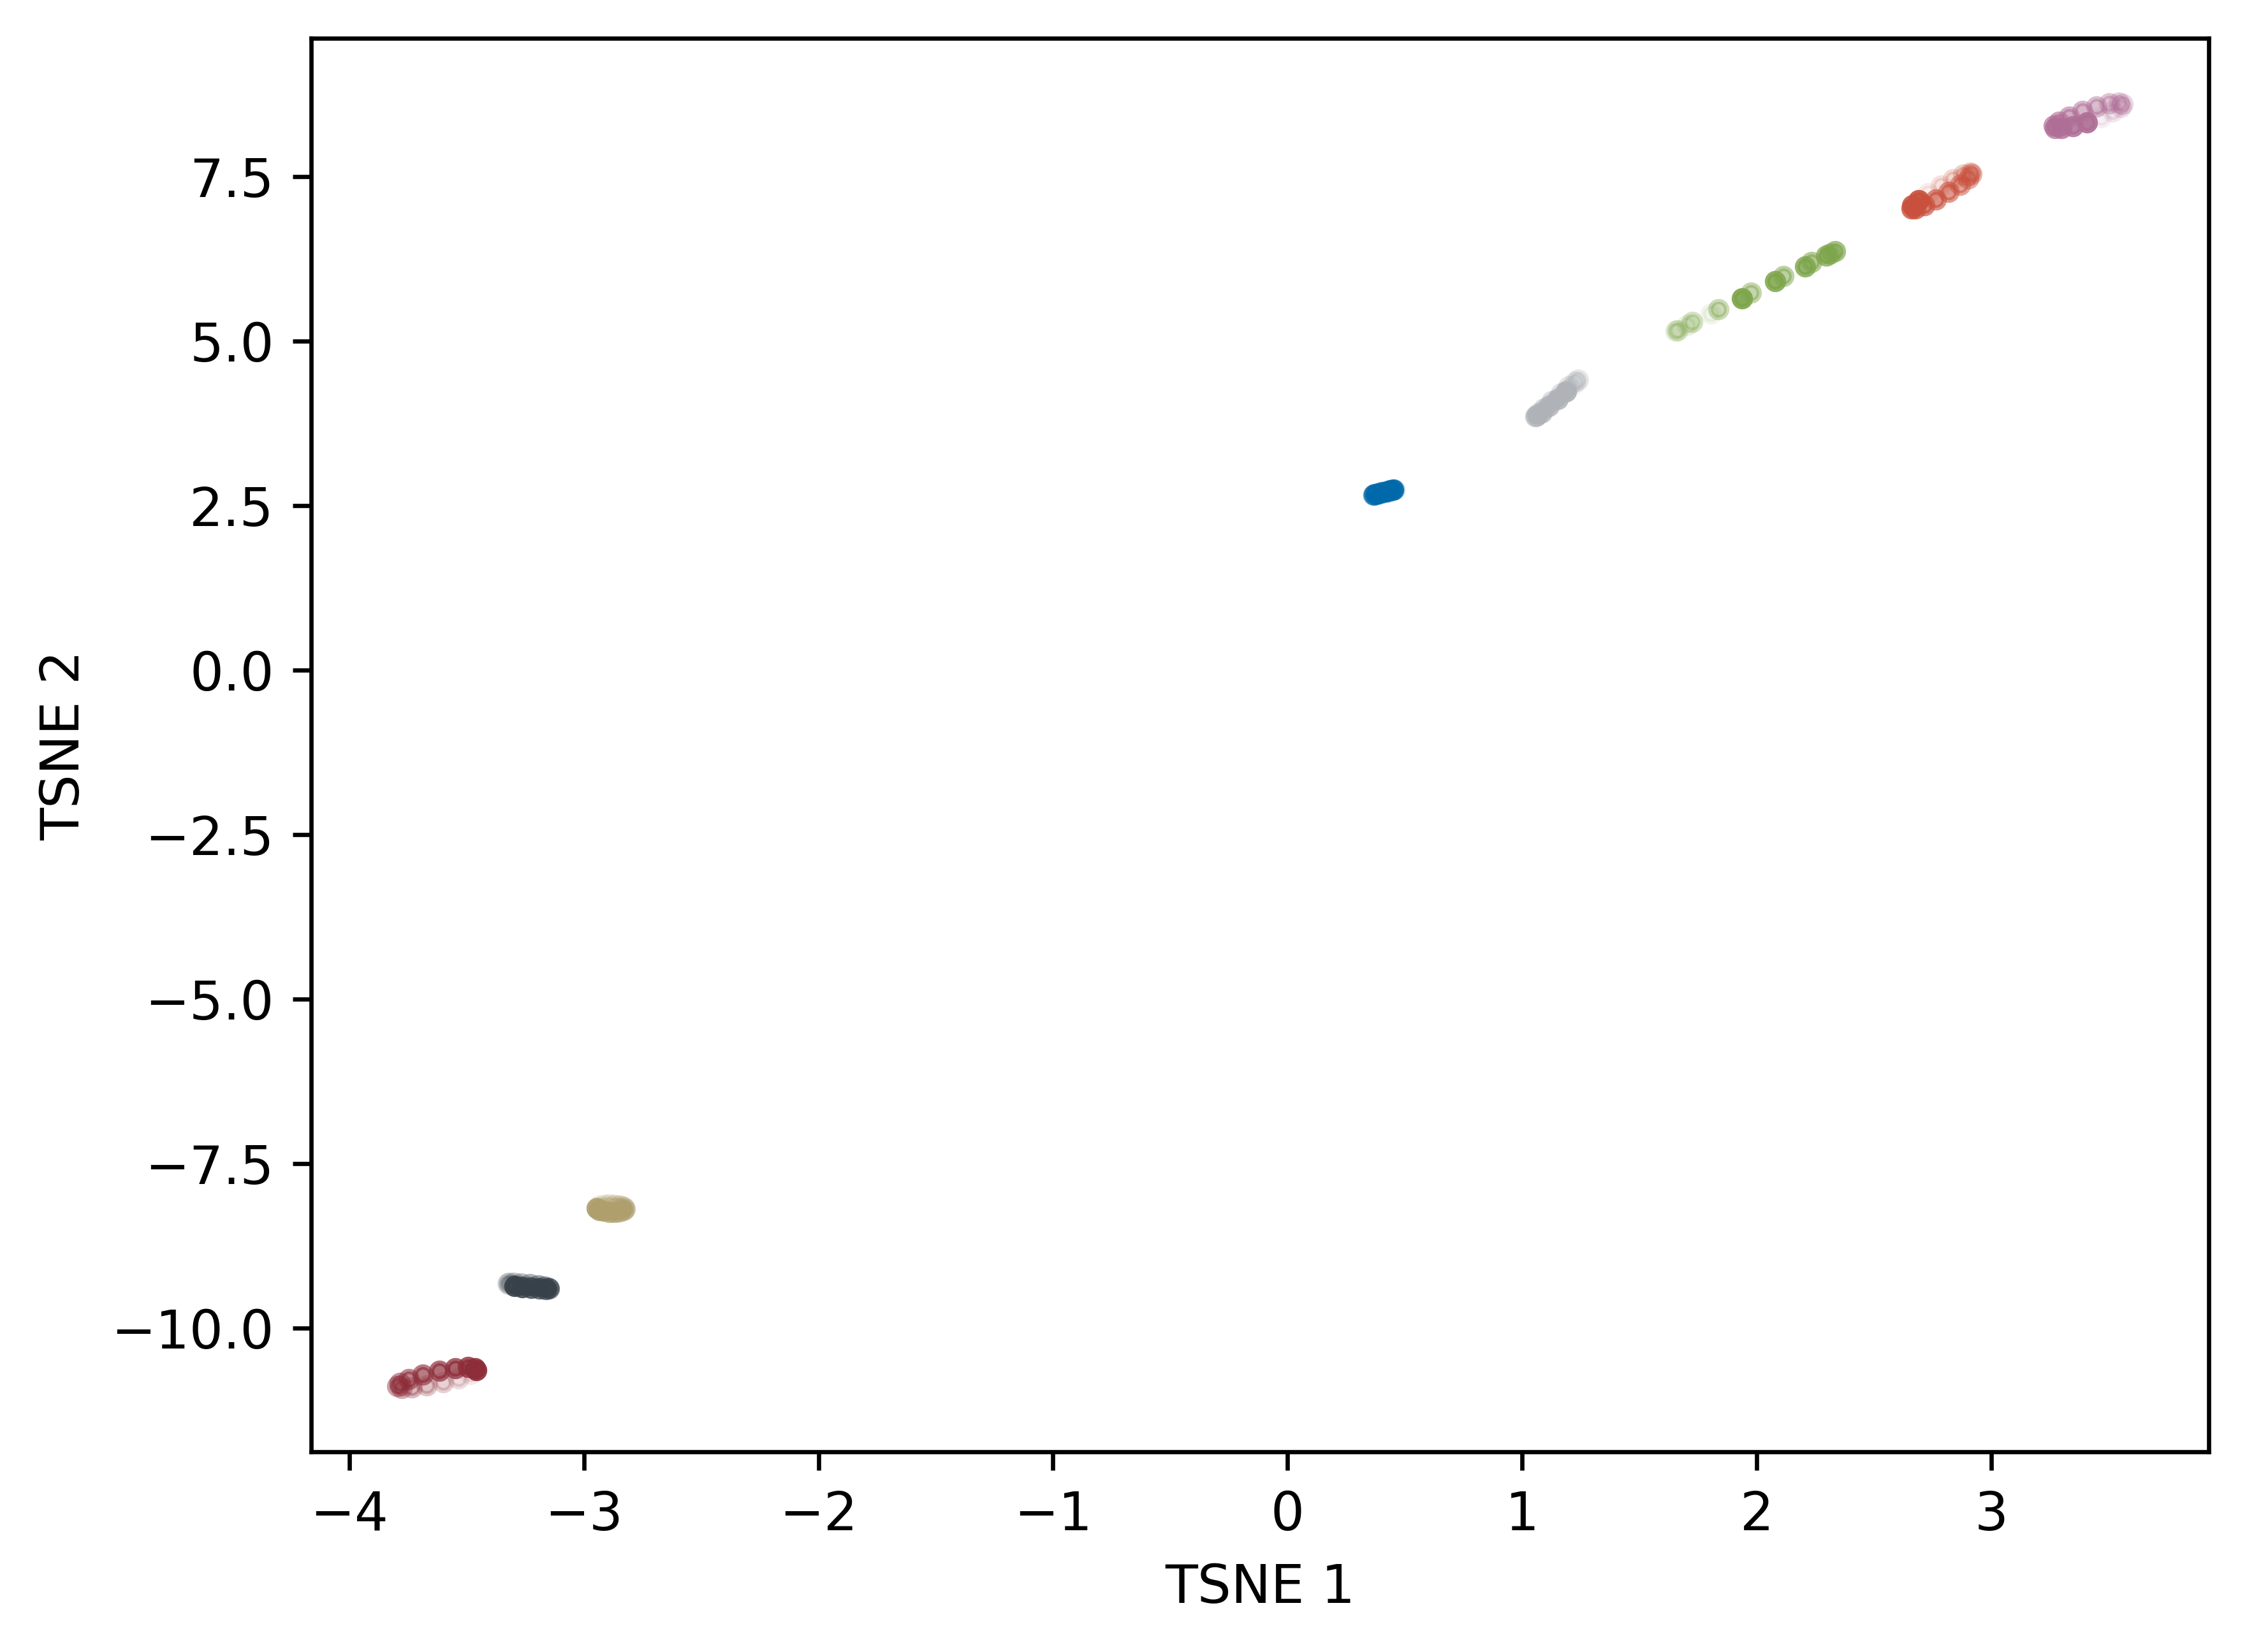

In [4]:
samples = np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/samples_for_animation.npy')
n_samples = 15
fig = plt.figure(1)
for j, sample in enumerate(samples.T):
    sample = sample.reshape((8, 2))
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=palettes.tue_plot[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
tikzplotlib.save("/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/staticAnimation.pgf")